In [1]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

In [2]:
url = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv'
url2= 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv'
s=requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
df.tail()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
41647,2020-06-21,Zimbabwe,NaN,-20.0,30.0,489.0,64.0,6.0
41648,2020-06-22,Zimbabwe,NaN,-20.0,30.0,512.0,64.0,6.0
41649,2020-06-23,Zimbabwe,NaN,-20.0,30.0,525.0,64.0,6.0
41650,2020-06-24,Zimbabwe,NaN,-20.0,30.0,530.0,123.0,6.0
41651,2020-06-25,Zimbabwe,NaN,-20.0,30.0,551.0,128.0,6.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41652 entries, 0 to 41651
Data columns (total 8 columns):
Date              41652 non-null object
Country/Region    41652 non-null object
Province/State    12792 non-null object
Lat               41652 non-null float64
Long              41652 non-null float64
Confirmed         41496 non-null float64
Recovered         39468 non-null float64
Deaths            41496 non-null float64
dtypes: float64(5), object(3)
memory usage: 2.5+ MB


In [5]:
print("STATISTICS IN INDIA")
df[df['Country/Region']=='India']

STATISTICS IN INDIA


,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
22464,2020-01-22,India,NaN,21.0,78.0,0.0,0.0,0.0
22465,2020-01-23,India,NaN,21.0,78.0,0.0,0.0,0.0
22466,2020-01-24,India,NaN,21.0,78.0,0.0,0.0,0.0
22467,2020-01-25,India,NaN,21.0,78.0,0.0,0.0,0.0
22468,2020-01-26,India,NaN,21.0,78.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
22615,2020-06-21,India,NaN,21.0,78.0,425282.0,237196.0,13699.0
22616,2020-06-22,India,NaN,21.0,78.0,440215.0,248190.0,14011.0
22617,2020-06-23,India,NaN,21.0,78.0,456183.0,258685.0,14476.0
22618,2020-06-24,India,NaN,21.0,78.0,473105.0,271697.0,14894.0


In [6]:
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d')
print('Last updated on',df.iloc[-1]['Date'].date())

Last updated on 2020-06-25


In [7]:
print("Processing...")
t1 = time.time()

Processing...


In [8]:
print("Total number of cases",sum(df[df['Country/Region']=='India']['Confirmed']))

Total number of cases 11759701.0


In [9]:
print("Latest increase of cases in 24 hours")
df[df['Country/Region']=='India'].iloc[-1]['Confirmed'] - df[df['Country/Region']=='India'].iloc[-2]['Confirmed']

Latest increase of cases in 24 hours


17296.0

In [10]:
x=df[df['Country/Region']=='India']['Confirmed']

In [11]:
y=df[df['Country/Region']=='India']['Date']

c:\users\vibha\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([737456., 737485., 737516., 737546., 737577., 737607.]),
 <a list of 6 Text major ticklabel objects>)

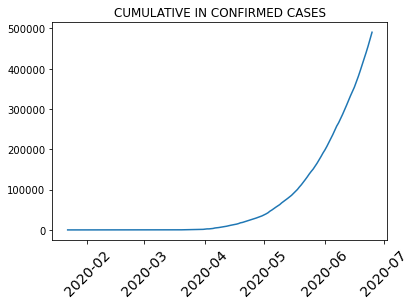

In [12]:
plt.plot(y,x)
plt.title('CUMULATIVE IN CONFIRMED CASES')
plt.xticks(rotation=45,fontsize=14)

In [13]:
print("Current number of confirmed cases")
df[df['Country/Region']=='India'].iloc[-1]['Confirmed']


Current number of confirmed cases


490401.0

No handles with labels found to put in legend.


INTERVAL OF 15 DAYS IS TAKEN


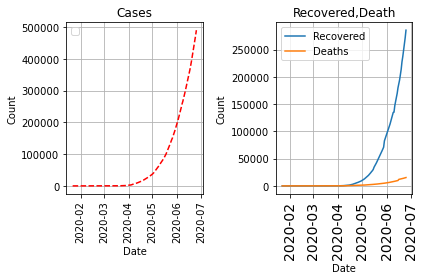

In [14]:
print('INTERVAL OF 15 DAYS IS TAKEN')
plt.subplot(1,2,1)
plt.plot(y, x, 'r--')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Cases')
plt.grid(True)
plt.xticks(rotation=90,fontsize=10)
plt.legend()# More on color options later

plt.subplot(1,2,2)
plt.plot(df[df['Country/Region']=='India']['Date'], df[df['Country/Region']=='India']['Recovered'], label='Recovered')
plt.plot(df[df['Country/Region']=='India']['Date'], df[df['Country/Region']=='India']['Deaths'], label='Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Recovered,Death')
plt.grid(True)
plt.legend()
plt.xticks(rotation=90,fontsize=14)
plt.tight_layout()

In [15]:
state_list=list(df['Country/Region'].unique())

In [16]:
for s in state_list:
    state_df=df[df['Country/Region']==s]
    df['newcases'] = df['Confirmed'].diff()
    df['newdeaths'] = df['Deaths'].diff()
  
    

In [17]:
arr=[]
arr_date=[]
for i in range(0,8):
    ele=df[df["Country/Region"]=='India'].iloc[-1-i]["Confirmed"]
    arr.append(ele)
arr.reverse()
for i in range(0,7):
    ele_date=df[df["Country/Region"]=='India'].iloc[-1-i]["Date"]
    arr_date.append(ele_date)
arr_date.reverse()
print("Input array  : ", arr)
print("Input date  : ", arr_date)
output_diffrence = np.diff(arr)
print("No. of new cases in the past 7 days ",output_diffrence )

Input array  :  [380532.0, 395048.0, 410451.0, 425282.0, 440215.0, 456183.0, 473105.0, 490401.0]
Input date  :  [Timestamp('2020-06-19 00:00:00'), Timestamp('2020-06-20 00:00:00'), Timestamp('2020-06-21 00:00:00'), Timestamp('2020-06-22 00:00:00'), Timestamp('2020-06-23 00:00:00'), Timestamp('2020-06-24 00:00:00'), Timestamp('2020-06-25 00:00:00')]
No. of new cases in the past 7 days  [14516. 15403. 14831. 14933. 15968. 16922. 17296.]


In [18]:
dates = df[df['Country/Region']=='India']['Date']
cases = df[df['Country/Region']=='India']['Confirmed']
deaths = df[df['Country/Region']=='India']['Deaths']
newcases = df[df['Country/Region']=='India']['newcases']
newdeaths = df[df['Country/Region']=='India']['newdeaths']

In [19]:
dates = df['Date'][df['Country/Region']=='India'][-8:-1]
cases = df['Confirmed'][df['Country/Region']=='India'][-8:-1]
deaths = df['Deaths'][df['Country/Region']=='India'][-8:-1]
newcases = df['newcases'][df['Country/Region']=='India'][-8:-1]
newdeaths = df['newdeaths'][df['Country/Region']=='India'][-8:-1]

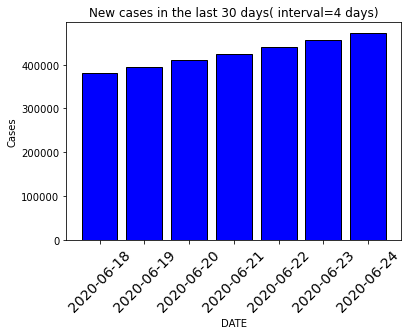

In [20]:
plt.bar(x=dates,height=cases,color='blue',edgecolor='k')
plt.xticks(rotation=45,fontsize=14)
plt.title('New cases in the last 30 days( interval=4 days)')
plt.xlabel('DATE')
plt.ylabel('Cases')
plt.show()



In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41652 entries, 0 to 41651
Data columns (total 10 columns):
Date              41652 non-null datetime64[ns]
Country/Region    41652 non-null object
Province/State    12792 non-null object
Lat               41652 non-null float64
Long              41652 non-null float64
Confirmed         41496 non-null float64
Recovered         39468 non-null float64
Deaths            41496 non-null float64
newcases          41494 non-null float64
newdeaths         41494 non-null float64
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 3.2+ MB


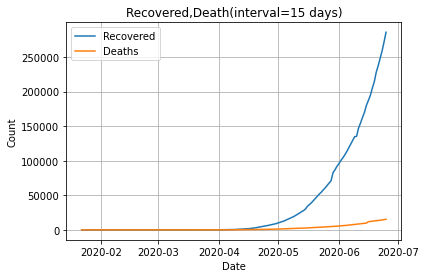

In [22]:
plt.plot(df[df['Country/Region']=='India']['Date'], df[df['Country/Region']=='India']['Recovered'], label='Recovered')
plt.plot(df[df['Country/Region']=='India']['Date'], df[df['Country/Region']=='India']['Deaths'], label='Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Recovered,Death(interval=15 days)')
plt.grid(True)
plt.legend()

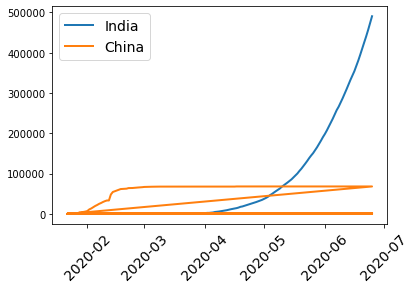

In [23]:
ind=df['Confirmed'][df['Country/Region']=='India']
ch=df['Confirmed'][df['Country/Region']=='China']
ita=df['Confirmed'][df['Country/Region']=='Italy']
usa=df['Confirmed'][df['Country/Region']=='US']
states=['India','China']
for s in states:
    plt.plot(df[df['Country/Region']==s]['Date'],
    df[df['Country/Region']==s]['Confirmed'],
    lw=2)
    plt.xticks(rotation=45,fontsize=14)

plt.legend(states,fontsize=14)
plt.show()
           

In [24]:
# %load coronavirus.py
"""Code used for notebooks and data exploration on
https://github.com/fangohr/coronavirus-2020"""


import datetime
import os
import time
import joblib
import numpy as np
import pandas as pd

# choose font - can be deactivated
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Inconsolata']
# need many figures for index.ipynb and germany.ipynb
rcParams['figure.max_open_warning'] = 50

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# suppress warning
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

LW = 3   # line width

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

# set up joblib memory to avoid re-fetching files
joblib_location = "./cachedir"
joblib_memory = joblib.Memory(joblib_location, verbose=0)


def clear_cache():
    """Need to run this before new data for the day is created"""
    joblib_memory.clear()


def double_time_exponential(q2_div_q1, t2_minus_t1=None):
    """ See https://en.wikipedia.org/wiki/Doubling_time"""
    if t2_minus_t1 is None:
        t2_minus_t1 = np.ones(q2_div_q1.shape)
    return t2_minus_t1 * np.log(2) / np.log(q2_div_q1)


def report_download(url, df):
    print(f"Downloaded data: last data point {df.columns[-1]} from {url}")


@joblib_memory.cache
def fetch_deaths_last_execution():
    """Use to remember at what time and date the last set of deaths was downloaded"""
    return datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S")


@joblib_memory.cache
def fetch_cases_last_execution():
    return datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S")


@joblib_memory.cache
def fetch_deaths():
    url = os.path.join(base_url, "time_series_covid19_" + "deaths" + "_global.csv")
    df = pd.read_csv(url, index_col=1)
    report_download(url, df)
    fetch_deaths_last_execution()
    return df


@joblib_memory.cache
def fetch_cases():
    url = os.path.join(base_url, "time_series_covid19_" + "confirmed" + "_global.csv")
    df = pd.read_csv(url, index_col=1)
    report_download(url, df)
    fetch_cases_last_execution()
    return df


def get_country(country):
    """Given a country name, return deaths and cases as a tuple of pandas time
    series. Works for all (?) countries in the world, or at least those in the
    Johns Hopkins data set. All rows should contain a datetime index and a
    value.
    """

    deaths = fetch_deaths()
    cases = fetch_cases()

    assert country in deaths.index, f"{country} not in available countries. These are {sorted(deaths.index)}"

    # Some countries report sub areas (i.e. multiple rows per country) such as China, France, United Kingdom
    # Denmark. In that case, we sum over all regions.
    tmp = deaths.loc[country]
    if len(tmp.shape) == 1:
        d = deaths.loc[country]
    elif len(tmp.shape) == 2:   # China, France, United Kingdom, ...
        d = deaths.loc[country].sum()
        d.rename("deaths", inplace=True)
    else:
        raise ValueError("Unknown data set structure for deaths {country}:", tmp)

    tmp = cases.loc[country]
    if len(tmp.shape) == 1:
        c = cases.loc[country]
    elif len(tmp.shape) == 2:
        c = cases.loc[country].sum()
        c.rename("cases", inplace=True)
    else:
        raise ValueError("Unknown data set structure for cases {country}:", tmp)

    # make date string into timeindex
    d.index = pd.to_datetime(d.index, errors="coerce", format="%m/%d/%y")
    c.index = pd.to_datetime(c.index, errors="coerce", format="%m/%d/%y")
    # drop all rows that don't have data
    # sanity check: how many do we drop?
    if c.index.isnull().sum() > 3:
        print(f"about to drop {c.index.isnull().sum()} entries due to NaT in index", c)
    c = c[c.index.notnull()]

    if d.index.isnull().sum() > 3:
        print(f"about to drop {d.index.isnull().sum()} entries due to NaT in index", d)
    d = d[d.index.notnull()]

    # check there are no NaN is in the data
    assert c.isnull().sum() == 0, f"{c.isnull().sum()} NaNs in {c}"
    assert d.isnull().sum() == 0, f"{d.isnull().sum()} NaNs in {d}"

    # label data
    c.country = country
    c.label = "cases"

    d.country = country
    d.label = "deaths"

    return c, d


def compose_dataframe_summary(cases, deaths):
    """Used in per-country template to show data table.
    Could be extended.
    Expects series of cases and deaths (time-alignd)
    """
    df = pd.DataFrame()
    df["total cases"] = cases
    df["daily new cases"] = cases.diff()
    df["total deaths"] = deaths
    df["daily new deaths"] = deaths.diff()
    return df


@joblib_memory.cache
def fetch_data_germany_last_execution():
    return datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S")

@joblib_memory.cache
def fetch_data_germany():
    """Data source is https://npgeo-corona-npgeo-de.hub.arcgis.com . The text on the
    webpage implies that the data comes from the Robert Koch Institute. """

    datasource = "https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv"
    t0 = time.time()
    print(f"Please be patient - downloading data from {datasource} ...")
    germany = pd.read_csv(datasource)
    delta_t = time.time() - t0
    print(f"Completed downloading {len(germany)} rows in {delta_t:.1f} seconds.")

    ## create new column 'landkreis' and get rid of "SK " and "LK " for this
    ## - this is too simplistic. We have fields like "Region Hannover"
    # germany['landkreis'] = germany['Landkreis'].apply(lambda s: s[3:])

    # (at least) the last data from the Robert-Koch-Institute (RKI) seems not to be
    # fully reported the day after. For example, on 3 April, the number of cases
    # from RKI is well below what is expected. Example:
    #
    # From RKI (as of evening of 2020-04-03:)
    # 2020-03-29    62653
    # 2020-03-30    66692
    # 2020-03-31    72333
    # 2020-04-01    77464
    # 2020-04-02    79625
    #
    # From Johns Hopkins (as of evening of 2020-04-03:):
    # 2020-03-29    62095
    # 2020-03-30    66885
    # 2020-03-31    71808
    # 2020-04-01    77872
    # 2020-04-02    84794
    #
    # So we must assume that the RKI data will be corrected later; maybe the next day.
    #
    # To make our plots not inaccurate, we'll remove the last data point from the RKI data:
    g2 = germany.set_index(pd.to_datetime(germany['Meldedatum']))
    g2.index.name = 'date'
    last_day = g2.index.max()
    sel = g2.index == last_day
    cleaned = g2.drop(g2[sel].index, inplace=False)
    fetch_data_germany_last_execution()
    return cleaned


def germany_get_region(state=None, landkreis=None):
    germany = fetch_data_germany()
    """Returns two time series: (cases, deaths)"""
    assert state or landkreis, "Need to provide a value for state or landkreis"

    if state and landkreis:
        raise NotImplementedError("Try to use 'None' for the state.")
        """We need to check if this is important."""

    if state:
        assert state in germany['Bundesland'].values, \
            f"{state} not in available German states. These are {sorted(germany['Bundesland'].drop_duplicates())}"

        land = germany[germany['Bundesland'] == state]
        land = land.set_index(pd.to_datetime(land['Meldedatum']))
        land.index.name = 'date'
        land.sort_index(inplace=True)

        # group over multiple rows for the same date
        # (this will also group over the different landkreise in the state)
        cases = land["AnzahlFall"].groupby('date').agg('sum').cumsum()
        cases.country = f'Germany-{state}'
        cases.label = 'cases'

        # group over all multiple entries per day
        deaths = land["AnzahlTodesfall"].groupby('date').agg('sum').cumsum()
        deaths.country = f'Germany-{state}'
        deaths.label = 'deaths'

        return cases, deaths

    if landkreis:
        assert landkreis in germany['Landkreis'].values, \
            f"{state} not in available German states. These are {sorted(germany['Landkreis'].drop_duplicates())}"

        lk = germany[germany["Landkreis"] == landkreis]
        lk.index = pd.to_datetime(lk['Meldedatum'])
        lk.index.name = 'date'
        lk = lk.sort_index()

        cases = lk["AnzahlFall"].groupby('date').agg('sum').cumsum()
        cases.country = f'Germany-{landkreis}'
        cases.label = 'cases'

        deaths = lk["AnzahlTodesfall"].groupby('date').agg('sum').cumsum()
        deaths.country = f'Germany-{landkreis}'
        deaths.label = 'deaths'

        return cases, deaths


def plot_time_step(ax, series, style="-", logscale=True):
    ax.step(series.index, series.values, style, label=series.country + " " + series.label,
           linewidth=LW)
    if logscale:
        ax.set_yscale('log')
    ax.legend()
    ax.set_ylabel("total numbers")
    return ax

def plot_change_bar(ax, series, color, rolling=None):
    change = series.diff().dropna()   # lose one point at beginning

    if rolling:
        rolling_label = f" {rolling}-day rolling mean"
        rolling_series = change.rolling(rolling, center=True).mean()
        bar_alpha = 0.2
    else:
        rolling_label = ""
        bar_alpha = 1.0

    label = series.country + " new " + series.label
    ax.bar(change.index, change.values, color=color, label=label, alpha=bar_alpha,
           linewidth=LW)
    if rolling:
        ax.plot(rolling_series.index, rolling_series.values, color=color, label=label + rolling_label,
                linewidth=LW)
    ax.legend()
    ax.set_ylabel('daily change')
    return ax

def plot_doubling_time(ax, series, color, minchange=10):
    # only keep values where there is a change of a minumum number
    sel = series.diff() <= minchange
    series.drop(series[sel].index, inplace=False)

    # we assume we have one value for every day - should check XXX
    q2_div_q1 = series.pct_change() + 1  # computes q2/q1
    q2_div_q1.replace(np.inf, np.nan, inplace=True)  # get rid of x/0 results
    q2_div_q1.dropna(inplace=True)
    dtime = double_time_exponential(q2_div_q1, t2_minus_t1=1)
    dtime.dropna(inplace=True)

    # exceptions:
    #
    # UK: data point on 15 March 2020 for only 1 new case, results in huge spike in doubling time (~790 days)
    # drop this
    if series.country == "United Kingdom" and series.label=="cases":
        # print(dtime)
        sel = dtime > 50
        dtime.drop(dtime[sel].index, inplace=True)
        print(f"Dropping UK data at {dtime[sel].index}, values are {dtime[sel]}")
    # end of exceptions

    label = series.country + " new " + series.label
    ax.plot(dtime.index, dtime.values, 'o', color=color, alpha=0.3, label=label)

    # need rolling average to smooth out weekly variations
    rolling = dtime.rolling(7, center=True).mean()

    # good to take maximum value from here
    ymax = min(rolling.max()*1.5, 500)
    if np.isnan(ymax):
        # This happens is rolling is empty, for example for deaths in Austria, Singapore
        # print(f"Can't plot doublingtime line for {series.label} in {series.country} due to too small numbers")
        ymax = 10

    # some countries require special care
    if series.country == 'China':
            ymax = 100

    ax.set_ylim(0, ymax)
    ax.plot(dtime.index, rolling, "-", color=color, alpha=1.0, label=label + ' 7-day rolling mean',
            linewidth=LW)
    ax.legend()
    ax.set_ylabel("doubling time [days]")
    return ax, rolling, dtime


def plot_growth_factor(ax, series, color, minchange=10):
    """relative change of number of new cases/deaths from day to day
    See https://youtu.be/Kas0tIxDvrg?t=330, 5:30 onwards
    """
    # only keep values where there is a change of a minumum number
    sel = series.diff() <= minchange
    series.drop(series[sel].index, inplace=False)

    f = series.diff(1).pct_change() + 1  # compute ratio of subsequent daily changes
                                         # use change over a week
    # division by zero may lead to np.inf in the data: get rid of that
    f.replace(np.inf, np.nan, inplace=True)
    f.dropna(inplace=True)

    # for very small case numbers, we get large growth factors (for example 1 death one day, followed by 7 the next)
    # we drop those high values.
    sel = f > 5
    f.drop(f[sel].index, inplace=True)
    values_dropped = sel.sum()
    if values_dropped >= 5:
        print(f"Dropping {values_dropped} from growth factor plot ({series.country}, {series.label})")

    label = series.country + " " + series.label + " growth factor"
    ax.plot(f.index, f.values, 'o', color=color, alpha=0.3, label=label)
    rolling = f.rolling(7, center=True).mean()
    rolling.dropna(inplace=True)
    label = series.country + " " + series.label + " growth factor 7-day mean"
    ax.plot(rolling.index, rolling.values, '-', color=color, label=label, linewidth=LW)

    ## looks much nicer - should we use this?
    # rolling2 = rolling.rolling(7, center=True).mean()
    # rolling2.dropna(inplace=True)
    # label = series.country + " " + series.label + " growth factor 7-day mean"
    # ax.plot(rolling2.index, rolling2.values, '-', color='C4', label=label, linewidth=LW)

    ax.legend()
    ax.set_ylabel("growth factor")
    ax.set_ylim(0, 2)  # should generally be below 1
    ax.plot([series.index.min(), series.index.max()], [1.0, 1.0], '-C3') # label="critical value"
    return ax, rolling, f


def test_plot_growth_factor():
    c, d = get_country("Korea, South")
    c, d = get_country("China")

    #c, d = get_country("Germany")
    #c, d = get_country("Italy")
    fix, ax = plt.subplots()
    plot_growth_factor(ax, c, 'C1');
    _, rolling, f = plot_growth_factor(ax, d, 'C0');
    return rolling, f
# rolling, f = test_plot_growth_factor()

def get_country_data(country, region=None, subregion=None):
    """Given the name of a country, get the Johns Hopkins data for cases and  deaths,
    and return them as a tuple of pandas.Series objects: (cases, deaths)
    If the country is "Germany", use the region (=Land) and subregion (=Kreis) to select
    the appropriate subset from the Robert Koch Institute. If only the region is provided,
    the data from all subregions in that region is accumulated.
    """

    if country.lower() == 'germany':
        if region == None and subregion == None:
            c, d = get_country(country)  # use johns hopkins data
        else:
            # use German data
            c, d = germany_get_region(state=region, landkreis=subregion)
    else:
        c, d = get_country(country)
    return c, d

#######################

def day0atleast(v0, series):
    try:
        day0 = series[series > v0].index[0]
    except IndexError:  # means no days found for which series.values > v0
        # print(f"Haven't found value > {v0} is Series {series.name}")
        result = pd.Series()
        return result

    # compute timedelta
    timedelta = series.index - day0
    # convert to int as index
    t = pd.to_numeric(timedelta.astype("timedelta64[D]").astype(int))
    # Assemble new series
    result = pd.Series(index=t, data=series.values)

    return result




def align_sets_at(v0, df):
    """Accepts data frame, and aligns so that all enttries close to v0 are on the same row.
    Returns new dataframe with integer index (reprenting days after v0).
    """
    res = pd.DataFrame()

    for col in df.columns:
        # res[col] = day0for(v0, df[col])
        series = day0atleast(v0, df[col])
        series.name = col
        res = pd.merge(res, series, how='outer', left_index=True, right_index=True)

    return res

def get_compare_data(countrynames, rolling=7):
    """Given a list of country names, return two dataframes: one with cases and one with deaths
    where
    - each column is one country
    - data in the column is the diff of accumulated numbers
    - any zero values are removed for italy (data error)
    - apply some smoothing
    """
    df_c = pd.DataFrame()
    df_d = pd.DataFrame()

    for countryname in countrynames:
        c, d = get_country(countryname)

        df_c[countryname] = c.diff().rolling(rolling, center=True).mean()  # cases 
        df_d[countryname] = d.diff().rolling(rolling, center=True).mean()  # deaths

    return df_c, df_d



def plot_logdiff_time(ax, df, xaxislabel, yaxislabel, style="", labels=True, labeloffset=2, v0=0,
                      highlight={}, other_lines_alpha=0.4):
    """highlight is dictionary: {country_name : color}"""
    for i, col in enumerate(df.columns):
        # print(f"plot_logdiff: Processing {i} {col}")
        if col in highlight:
            # print(f"Found highlight: {col}")
            alpha = 1.0
            color = highlight[col]
            linewidth = 4
        else:
            alpha = other_lines_alpha
            # have only 10 colours
            color = style + 'C' + str(i % 10)
            linewidth = 2

        ax.plot(df.index, df[col].values, color, label=col, linewidth=linewidth, alpha=alpha)
        if labels:
            tmp = df[col].dropna()
            if len(tmp) > 0:   # possible we have no data points
                x, y = tmp.index[-1], tmp.values[-1]
                ax.annotate(col, xy=(x + labeloffset, y), textcoords='data')
                ax.plot([x], [y], "o" + color, alpha=alpha)
    # ax.legend()
    ax.set_ylabel(yaxislabel)
    ax.set_xlabel(xaxislabel)
    ax.set_yscale('log')
    # ax.set_xscale('log')    # also interesting
    ax.set_ylim(bottom=v0)  # remove setting limit?, following
                              # https://github.com/fangohr/coronavirus-2020/issues/3
    ax.set_xlim(left=-1)  #ax.set_xlim(-1, df.index.max())
    ax.tick_params(left=True, right=True, labelleft=True, labelright=True)
    ax.yaxis.set_ticks_position('both')


def make_compare_plot(main_country, compare_with=["China", "Italy", "US", "Korea, South",
                                                  "Spain", "United Kingdom", "Iran"],
                     v0c=10, v0d=3):
    rolling = 7
    df_c, df_d = get_compare_data([main_country] + compare_with, rolling=rolling)
    res_c = align_sets_at(v0c, df_c)
    res_d = align_sets_at(v0d, df_d)
    fig, axes = plt.subplots(2, 1, figsize=(10, 6))
    ax=axes[0]
    plot_logdiff_time(ax, res_c, f"days since {v0c} cases",
                      "daily new cases\n(rolling 7-day mean)",
                      v0=v0c, highlight={main_country:"C1"})
    ax = axes[1]
    plot_logdiff_time(ax, res_d, f"days since {v0d} deaths",
                      "daily new deaths\n(rolling 7-day mean)",
                      v0=v0d, highlight={main_country:"C0"})

    fig.tight_layout(pad=1)
    title = f"Daily cases (top) and deaths (below) for {main_country}"
    axes[0].set_title(title)

    return axes, res_c, res_d



###################### Compare plots for Germany

def label_from_region_subregion(region_subregion):
    region, subregion = unpack_region_subregion(region_subregion)
    if subregion:
        if region:
            label = f"{region}-{subregion}"
        else:
            label = f"{subregion}"
    else:
        label = f"{region}"
    return label


def test_label_from_region_subregion():
    assert label_from_region_subregion(("Hamburg", None)) == "Hamburg"
    assert label_from_region_subregion("Hamburg") == "Hamburg"
    assert label_from_region_subregion(("Schleswig Holstein", "Pinneberg")) == "Schleswig Holstein-Pinneberg"




def unpack_region_subregion(region_subregion):
    """Convention for regions in Germany (could also be useful for other countries later):
    - region_subregion is either
      - a tuple of strings (region, subregion) or
      - a string "region"
    Return a a tuple (region, subregion), where subregion is None if not provided.
    """
    if isinstance(region_subregion, tuple):
        if len(region_subregion) == 1:
            region = region_subregion[0]
            subregion = None
        elif len(region_subregion) == 2:
            region, subregion = region_subregion
        else:
            raise ValueError("region_subregion must be single value or 2-valued tuple", region_subregion)
    else:
        # assume it is just the region
        assert isinstance(region_subregion, str)
        region, subregion = region_subregion, None
    return region, subregion

test_label_from_region_subregion()

def get_compare_data_germany(region_subregion, compare_with_local, rolling=7):
    """Given a region_subregion for Germany, and a list of region_subregion to compare with,
    return two dataframes: one with cases and one with deaths
    where
    - each column is one country
    - data in the column is the diff of accumulated numbers
    - any zero values are removed for italy (data error)
    - apply some smoothing
    See unpack_region_subregion for details on region_subregion.
    """
    df_c = pd.DataFrame()
    df_d = pd.DataFrame()

    for reg_subreg in [region_subregion] + compare_with_local:

        region, subregion = unpack_region_subregion(reg_subreg)
        c, d = germany_get_region(state=region, landkreis=subregion)

        label = label_from_region_subregion((region, subregion))
        df_c[label] = c.diff().rolling(rolling, center=True).mean()  # cases
        df_d[label] = d.diff().rolling(rolling, center=True).mean()  # deaths

    return df_c, df_d


def make_compare_plot_germany(region_subregion,
                              compare_with=[], #"China", "Italy", "Germany"],
                              compare_with_local=['Baden-Württemberg', 'Bayern', 'Berlin',
                                                  'Brandenburg', 'Bremen', 'Hamburg',
                                                  'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
                                                  'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland',
                                                  'Sachsen', 'Sachsen-Anhalt', 'Schleswig-Holstein',  'Thüringen'],
                              v0c=10, v0d=1):
    rolling = 7
    region, subregion = unpack_region_subregion(region_subregion)
    df_c1, df_d1 = get_compare_data_germany((region, subregion), compare_with_local, rolling=rolling)
    df_c2, df_d2 = get_compare_data(compare_with, rolling=rolling)

    # need to get index into same timezone before merging
    df_d1.set_index(df_d1.index.tz_localize(None), inplace=True)
    df_c1.set_index(df_c1.index.tz_localize(None), inplace=True)

    df_c = pd.merge(df_c1, df_c2, how='outer', left_index=True, right_index=True)
    df_d = pd.merge(df_d1, df_d2, how='outer', left_index=True, right_index=True)

    res_c = align_sets_at(v0c, df_c)
    res_d = align_sets_at(v0d, df_d)

    fig, axes = plt.subplots(2, 1, figsize=(10, 6))
    ax=axes[0]
    plot_logdiff_time(ax, res_c, f"days since {v0c} cases",
                      "daily new cases\n(rolling 7-day mean)",
                      v0=v0c, highlight={res_c.columns[0]:"C1"}, labeloffset=0.5)
    ax = axes[1]

    res_d_0 = res_d[res_d.index >= 0]   # from "day 0" only
    # if we have values in between 0.1 and 1, set the lower `y_limit` on the graph to 0.1
    if res_d_0[(res_d_0 > 0.1) & (res_d_0 < 1)].any().any():    # there must be a more elegant check
        y_limit = 0.1
    else:
        y_limit = v0d
    plot_logdiff_time(ax, res_d, f"days since {v0d} deaths",
                      "daily new deaths\n(rolling 7-day mean)",
                      v0=y_limit, highlight={res_d.columns[0]:"C0"},
                      labeloffset=0.5)

    fig.tight_layout(pad=1)

    title = f"Daily cases (top) and deaths (below) for Germany: {label_from_region_subregion((region, subregion))}"
    axes[0].set_title(title)

    return axes, res_c, res_d


#######################


def overview(country, region=None, subregion=None, savefig=False):
    c, d = get_country_data(country, region=region, subregion=subregion)

    fig, axes = plt.subplots(5, 1, figsize=(10, 12), sharex=False)
    ax = axes[0]
    plot_time_step(ax=ax, series=c, style="-C1")
    plot_time_step(ax=ax, series=d, style="-C0")

    ax = axes[1]
    plot_change_bar(ax=ax, series=c, rolling=7, color="C1")
    if country == "China":
        ax.set_ylim(0, 5000)

    ax = axes[2]
    plot_change_bar(ax=ax, series=d, rolling=7, color="C0")

    ax = axes[3]
    plot_growth_factor(ax, series=d, color="C0")
    plot_growth_factor(ax, series=c, color="C1")

    ax = axes[4]
    plot_doubling_time(ax, series=d, color="C0")
    plot_doubling_time(ax, series=c, color="C1")

    # enforce same x-axis on all plots
    for i in range(1, 5):
        axes[i].set_xlim(axes[0].get_xlim())
    for i in range(0, 5):
        axes[i].tick_params(left=True, right=True, labelleft=True, labelright=True)
        axes[i].yaxis.set_ticks_position('both')


    title = f"Overview {c.country}, last data point from {df.iloc[-1]['Date'].date()}"
    axes[0].set_title(title)

    fig.tight_layout(pad=1)
    filename = os.path.join("figures", c.country.replace(" ", "-").replace(",", "-") + '.svg')
    if savefig:
        fig.savefig(filename)

    if not subregion and not region: # i.e. not a region of Germany
        axes_compare, res_c, res_d = make_compare_plot(country)
        return_axes = np.concatenate([axes, axes_compare])

    elif country=="Germany":   # Germany specific plots
        # On 11 April, Mecklenburg Vorpommern data was missing from data set.
        # We thus compare only against those Laender, that are in the data set:
        germany = fetch_data_germany()
        laender = list(germany['Bundesland'].drop_duplicates().sort_values())
        axes_compare, res_c, red_d = make_compare_plot_germany((region, subregion),
                                                               compare_with_local=laender)
        return_axes = np.concatenate([axes, axes_compare])

    fig2 = plt.gcf()

    if savefig:
        filename = os.path.join("figures", c.country.replace(" ", "-").replace(",", "-") + '2.svg')
        fig2.savefig(filename)

    return return_axes, c, d

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


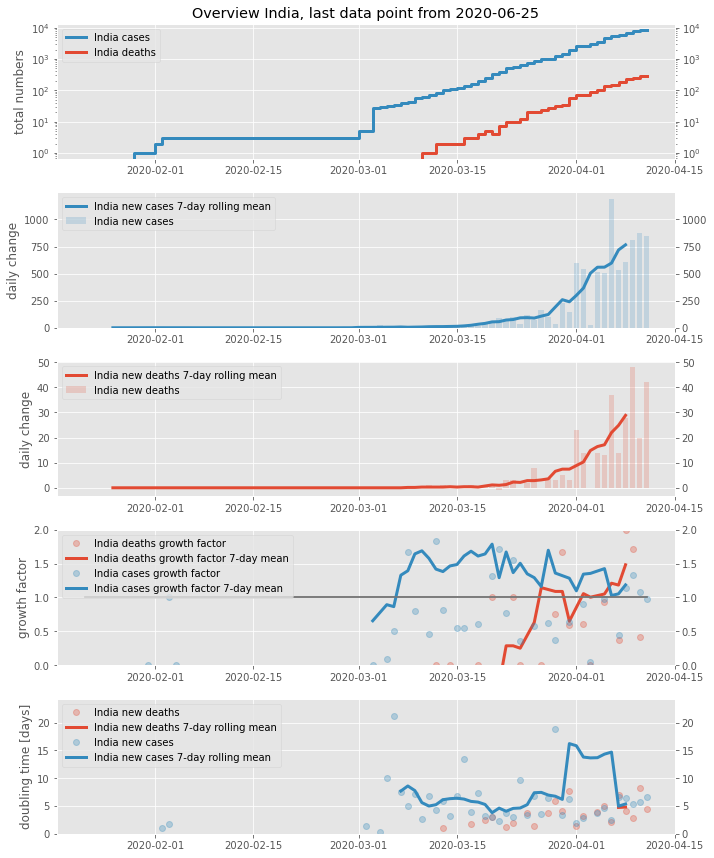

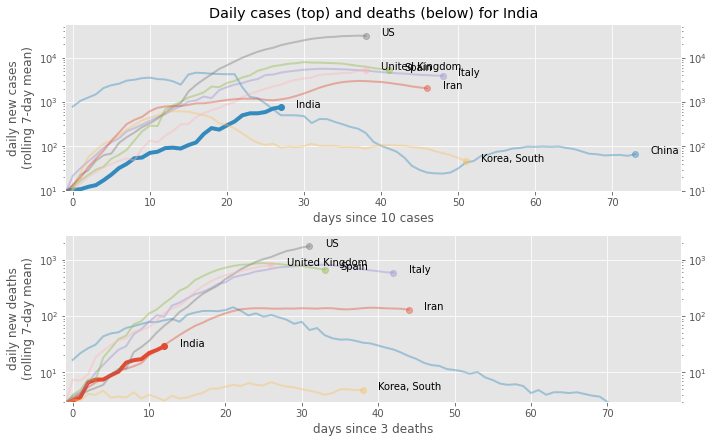

In [25]:
import coronavirus 
axes, cases, deaths = overview("India")

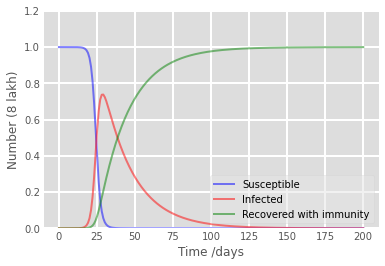

In [27]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# Total population, N.
N = 8000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.7, 1./20 
# A grid of time points (in days)
t = np.linspace(0, 200, 200)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/8000000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/8000000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/8000000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (8 lakh)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()